<a href="https://colab.research.google.com/github/LucaNoto/PF_CoderHouse/blob/main/Analise_ausentes_%26_heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mortes ocorridas em São Paulo em 2019 à 2022

In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from folium.plugins import HeatMap
import folium
from folium import plugins


from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter


In [228]:
df=pd.read_csv('data/compiledData/dfMortesCompilado.csv')
df

,DEPARTAMENTO_CIRCUNSCRICAO,SECCIONAL_CIRCUNSCRICAO,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,NUM_VITIMA,ID_DELEGACIA,DATAHORA_REGISTRO_BO,NUM_BO,ANO_BO,MUNICIPIO_ELABORACAO,...,COR_PELE,PROFISSAO,NATUREZA_APURADA,CRIME,DESDOBRAMENTO,DESCR_PERIODO,FLAG_VITIMA_FATAL,CONDUTA,COORPORACAO,SITUACAO
0,DECAP,1ª SEC,São Paulo,001 DP - Sé,1.0,10108,2019-01-01 07:56:59,3,2019,S.PAULO,...,Branca,NAO INFORMADA,HOMICÍDIO DOLOSO,Homicídio Doloso,NaN,NaN,NaN,NaN,NaN,NaN
1,DECAP,1ª SEC,São Paulo,001 DP - Sé,1.0,10101,2019-01-18 16:32:41,372,2019,S.PAULO,...,Parda,NaN,HOMICÍDIO DOLOSO,Homicídio Doloso,NaN,NaN,NaN,NaN,NaN,NaN
2,DECAP,1ª SEC,São Paulo,002 DP - Bom Retiro,1.0,10102,2019-01-25 22:53:07,490,2019,S.PAULO,...,Preta,NaN,HOMICÍDIO DOLOSO,Homicídio Doloso,NaN,NaN,NaN,NaN,NaN,NaN
3,DECAP,1ª SEC,São Paulo,005 DP - Aclimação,1.0,10342,2019-01-20 00:15:18,534,2019,S.PAULO,...,Amarela,NaN,HOMICÍDIO DOLOSO,Homicídio Doloso,NaN,NaN,NaN,NaN,NaN,NaN
4,DECAP,1ª SEC,São Paulo,005 DP - Aclimação,1.0,10342,2019-01-23 00:07:25,624,2019,S.PAULO,...,Branca,NAO INFORMADA,HOMICÍDIO DOLOSO,Homicídio Doloso,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3597,DECAP,8ª SEC,São Paulo,069 DP - Teotônio Vilela,1.0,10362,2022-07-14 00:00:00,4490,2022,S.PAULO,...,Branca,POLICIAL MILITAR,HOMICÍDIO DOLOSO,Feminicidio,Feminicídio-contra a mulher por razões da cond...,NaN,Sim,NaN,NaN,NaN
3598,DECAP,4ª SEC,São Paulo,073 DP - Jaçanã,1.0,10336,2022-08-24 00:00:00,6221,2022,S.PAULO,...,Parda,PRENDAS DOMESTICAS,HOMICÍDIO DOLOSO,Feminicidio,Feminicídio-contra a mulher por razões da cond...,NaN,Sim,NaN,NaN,NaN
3599,DECAP,6ª SEC,São Paulo,047 DP - Capão Redondo,1.0,10247,2022-08-09 00:00:00,6897,2022,S.PAULO,...,Parda,OUTROS,HOMICÍDIO DOLOSO,Feminicidio,Feminicídio-contra a mulher por razões da cond...,NaN,Sim,NaN,NaN,NaN
3600,DECAP,7ª SEC,São Paulo,024 DP - Ponte Rasa,1.0,20210,2022-08-08 00:00:00,3395,2022,S.PAULO,...,Branca,CABELEIREIRO(A),HOMICÍDIO DOLOSO,Feminicidio,Feminicídio-contra a mulher por razões da cond...,NaN,Sim,NaN,NaN,NaN


In [227]:
len(df.columns)

34

## Quais são as nossas variáveis?

In [202]:
print("os nomes das variáveis :\n", list(df.columns))

os nomes das variáveis :
 ['DEPARTAMENTO_CIRCUNSCRICAO', 'SECCIONAL_CIRCUNSCRICAO', 'MUNICIPIO_CIRCUNSCRICAO', 'DP_CIRCUNSCRICAO', 'NUM_VITIMA', 'ID_DELEGACIA', 'DATAHORA_REGISTRO_BO', 'NUM_BO', 'ANO_BO', 'MUNICIPIO_ELABORACAO', 'DP_ELABORACAO', 'SEC_ELABORACAO', 'DEP_ELABORACAO', 'DATA_FATO', 'HORA_FATO', 'DESC_TIPOLOCAL', 'LOGRADOURO', 'NUMERO_LOGRADOURO', 'LATITUDE', 'LONGITUDE', 'TIPO_PESSOA', 'SEXO_PESSOA', 'IDADE_PESSOA', 'DATA_NASCIMENTO_PESSOA', 'COR_PELE', 'PROFISSAO', 'NATUREZA_APURADA', 'CRIME', 'DESDOBRAMENTO', 'DESCR_PERIODO', 'FLAG_VITIMA_FATAL', 'CONDUTA', 'COORPORACAO', 'SITUACAO']


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3602 entries, 0 to 3601
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DEPARTAMENTO_CIRCUNSCRICAO  3602 non-null   object 
 1   SECCIONAL_CIRCUNSCRICAO     3602 non-null   object 
 2   MUNICIPIO_CIRCUNSCRICAO     3602 non-null   object 
 3   DP_CIRCUNSCRICAO            3602 non-null   object 
 4   NUM_VITIMA                  2549 non-null   float64
 5   ID_DELEGACIA                3602 non-null   object 
 6   DATAHORA_REGISTRO_BO        3597 non-null   object 
 7   NUM_BO                      3602 non-null   object 
 8   ANO_BO                      3602 non-null   object 
 9   MUNICIPIO_ELABORACAO        3602 non-null   object 
 10  DP_ELABORACAO               3602 non-null   object 
 11  SEC_ELABORACAO              3602 non-null   object 
 12  DEP_ELABORACAO              3602 non-null   object 
 13  DATA_FATO                   3602 

## Lidando com valores ausentes

In [204]:
# Quais são os valores totais ausentes no conjunto de dados ?
print("A base de dados possui: ", df.isna().sum().sum(),'dados ausentes')

A base de dados possui:  22366 dados ausentes


In [205]:
# Vamos contar o número de dados ausentes por coluna
missing_values = list(df.isna().sum())
# valores ausentes é uma lista do número de valores ausentes em cada coluna

cols = list(df.columns)
col_final = []
for i in range(len(cols)):
    if (missing_values[i] == 0):
        cols[i]="Others"
d = dict(zip(cols, missing_values)) # fazendo um dicionário para os valores ausentes

print("Number of Missing Values per feature >>")
missing_vals = pd.DataFrame(d, index=["Missing Values"]) # Fazendo um dataframe personalizado a partir do dict d
missing_vals.head()

Number of Missing Values per feature >>


,Others,NUM_VITIMA,DATAHORA_REGISTRO_BO,HORA_FATO,DESC_TIPOLOCAL,NUMERO_LOGRADOURO,LATITUDE,LONGITUDE,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA,PROFISSAO,DESDOBRAMENTO,DESCR_PERIODO,FLAG_VITIMA_FATAL,CONDUTA,COORPORACAO,SITUACAO
Missing Values,0,1053,5,7,1,632,747,747,421,456,1126,2554,3602,2616,3125,2637,2637


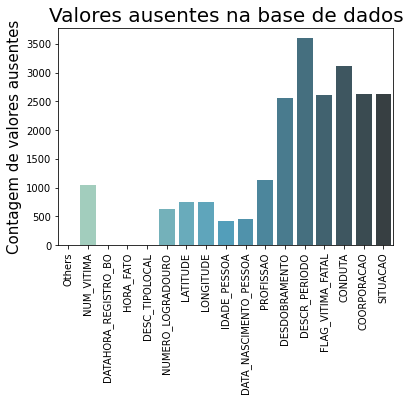

In [206]:
# Plotando os valores ausentes
x = list(d.keys())
y = list(d.values())
sns.barplot(x=x, y=y, palette="GnBu_d")
plt.xticks(rotation=90)
plt.title("Valores ausentes na base de dados", fontdict = {'fontsize': 20})
plt.ylabel("Contagem de valores ausentes", fontdict={'fontsize': 15})
plt.show()

## Por que essa quantidade de valores ausentes ?


Ao analisar a base percebe-se que a maioria das informações que aparece como 'NaN' são sobre a situação da ocorrência. Como os dados são de 2019 à 2022 informações como 'desdobramento','Situação', entre outros.Ainda podem ser preenchidas ao fim do processo.<p>
 A variável 'FLAG_VITIMA_FATAL' só é preenchida quando ocorre flagrante, é um termo jurídico usado para indicar que um criminoso foi pego no momento em que cometia um crime, o que na maioria dos caso não ocorre.
Como neste estudo a gente só quer ver onde foi registrado o crime essas variáveis serão deletadas.<p>

Ainda temos alguns dados relevantes que também estão ausentes, dados como Latitude, Longitude, idade, etc. Como esses recursos não são valores numéricos diretos, não podemos usar funções estatísticas resumidas para preencher os valores ausentes.
Portanto, removeremos esses valores do conjunto de dados.<p>

In [207]:
#tirando as variáveis que possuem muitos valores ausentes
dfClean =df.drop(columns=['NUM_VITIMA','PROFISSAO','DESDOBRAMENTO','DESCR_PERIODO','FLAG_VITIMA_FATAL','CONDUTA','COORPORACAO','SITUACAO'])

In [208]:
dfClean = dfClean.dropna()

In [209]:
dfClean['TIPO_PESSOA'] = dfClean['TIPO_PESSOA'].str.strip().str.upper()

In [210]:
dfClean['TIPO_PESSOA'].value_counts()

VÍTIMA                  1638
AUTOR/VITIMA             742
ADOLESCENTE INF/VIT       44
ADOLESCENTE               12
INDICIADO                  7
ENCONTRO DE CADÁVER        1
ADOLESCENTE INFRATOR       1
RDO NÃO LOCALIZADO         1
Name: TIPO_PESSOA, dtype: int64

In [211]:
dfClean = dfClean[dfClean['TIPO_PESSOA']=='VÍTIMA']

In [212]:
dfClean['DATAHORA_REGISTRO_BO'] = pd.to_datetime(dfClean['DATAHORA_REGISTRO_BO'])
dfClean['DATA_FATO'] = pd.to_datetime(dfClean['DATA_FATO'])
dfClean['HORA_FATO_DT'] = pd.to_datetime(dfClean['HORA_FATO'],errors = 'coerce').dt.strftime('%H')


dfClean['ANO_BO'] = dfClean['ANO_BO'].astype(str)
dfClean['NUM_BO'] = dfClean['NUM_BO'].astype(str)

dfClean['MES_BO'] = dfClean['DATAHORA_REGISTRO_BO'].dt.strftime('%m')
dfClean['DIA_BO'] = dfClean['DATAHORA_REGISTRO_BO'].dt.strftime('%d')
dfClean['HORA_BO'] = dfClean['DATAHORA_REGISTRO_BO'].dt.strftime('%H')
dfClean['DIA_SEMANA_BO'] = dfClean['DATAHORA_REGISTRO_BO'].dt.dayofweek

dfClean['ANO_FATO'] = dfClean['DATA_FATO'].dt.strftime('%Y')
dfClean['MES_FATO'] = dfClean['DATA_FATO'].dt.strftime('%m')
dfClean['DIA_FATO'] = dfClean['DATA_FATO'].dt.strftime('%d')
dfClean['DIA_SEMANA_FATO'] = dfClean['DATA_FATO'].dt.dayofweek


In [213]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1638 entries, 0 to 3599
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   DEPARTAMENTO_CIRCUNSCRICAO  1638 non-null   object        
 1   SECCIONAL_CIRCUNSCRICAO     1638 non-null   object        
 2   MUNICIPIO_CIRCUNSCRICAO     1638 non-null   object        
 3   DP_CIRCUNSCRICAO            1638 non-null   object        
 4   ID_DELEGACIA                1638 non-null   object        
 5   DATAHORA_REGISTRO_BO        1638 non-null   datetime64[ns]
 6   NUM_BO                      1638 non-null   object        
 7   ANO_BO                      1638 non-null   object        
 8   MUNICIPIO_ELABORACAO        1638 non-null   object        
 9   DP_ELABORACAO               1638 non-null   object        
 10  SEC_ELABORACAO              1638 non-null   object        
 11  DEP_ELABORACAO              1638 non-null   object      

In [214]:
# Demora uns 13min pra rodar!!!

dfClean["LAT_LONG"] = dfClean["LATITUDE"].astype(str) + ',' + dfClean['LONGITUDE'].astype(str)

locator = Nominatim(user_agent="myGeocoder", timeout=10)
rgeocode = RateLimiter(locator.reverse, min_delay_seconds=0.5)

dfClean['RESPONSE_GEOLOCATOR'] = dfClean["LAT_LONG"].apply(rgeocode)

In [215]:
dfClean['GEOLOCATOR_ADDRESS'] = dfClean['RESPONSE_GEOLOCATOR'].apply(lambda loc: loc.raw['address'])
dfClean['GEOLOCATOR_NEIGHBORHOOD'] = dfClean['GEOLOCATOR_ADDRESS'].apply(lambda addr: addr.get('suburb', '-')).str.upper()
dfClean['GEOLOCATOR_POSTCODE'] = dfClean['GEOLOCATOR_ADDRESS'].apply(lambda addr: addr.get('postcode', '-')).str.upper()


mapZonas = {'01':'Centro',
            '02':'Zona Norte',
            '03':'Zona Leste',
            '04':'Zona Sul',
            '05':'Zona Oeste',
            '06':'-',
            '07':'-',
            '08':'Zona Leste',
            '09':'-',
            '38':'-',
            '-':'-'}

dfClean['ZONE_FROM_POSTCODE'] = dfClean['GEOLOCATOR_POSTCODE'].str[:2].map(mapZonas)

In [216]:
dfClean['BO_ANO'] = dfClean[['NUM_BO', 'ANO_BO']].agg('-'.join, axis=1)

In [217]:
dfNumDeVitimas = dfClean['BO_ANO'].value_counts().reset_index().rename(columns={'index':'BO_ANO','BO_ANO':'NUM_VITIMAS_CRIME'})

In [218]:
dfClean = dfClean.merge(dfNumDeVitimas,how='left',on='BO_ANO')

In [219]:
dfClean

,DEPARTAMENTO_CIRCUNSCRICAO,SECCIONAL_CIRCUNSCRICAO,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,ID_DELEGACIA,DATAHORA_REGISTRO_BO,NUM_BO,ANO_BO,MUNICIPIO_ELABORACAO,DP_ELABORACAO,...,DIA_FATO,DIA_SEMANA_FATO,LAT_LONG,RESPONSE_GEOLOCATOR,GEOLOCATOR_ADDRESS,GEOLOCATOR_NEIGHBORHOOD,GEOLOCATOR_POSTCODE,ZONE_FROM_POSTCODE,BO_ANO,NUM_VITIMAS_CRIME
0,DECAP,1ª SEC,São Paulo,001 DP - Sé,10108,2019-01-01 07:56:59,3,2019,S.PAULO,08º D.P. BRAS,...,01,1,"-23.5462154481364,-46.631733309032","(Rua Vinte e Cinco de Março, Sé, São Paulo, Re...","{'road': 'Rua Vinte e Cinco de Março', 'suburb...",SÉ,01015-020,Centro,3-2019,1
1,DECAP,1ª SEC,São Paulo,001 DP - Sé,10101,2019-01-18 16:32:41,372,2019,S.PAULO,01º D.P. SE,...,18,4,"-23.5546896292896,-46.6296510483604","(Vila Suíça, Sé, São Paulo, Região Imediata de...","{'road': 'Vila Suíça', 'suburb': 'Sé', 'city':...",SÉ,01514-020,Centro,372-2019,1
2,DECAP,1ª SEC,São Paulo,005 DP - Aclimação,10342,2019-01-20 00:15:18,534,2019,S.PAULO,78º D.P. JARDINS,...,19,5,"-23.560415289045,-46.6337071030673","(Rua São Joaquim, Liberdade, São Paulo, Região...","{'road': 'Rua São Joaquim', 'suburb': 'Liberda...",LIBERDADE,01511-001,Centro,534-2019,2
3,DECAP,1ª SEC,São Paulo,005 DP - Aclimação,10342,2019-01-23 00:07:25,624,2019,S.PAULO,78º D.P. JARDINS,...,22,1,"-23.5629637062019,-46.6455014429631","(1627, Avenida Brigadeiro Luís Antônio, Bela V...","{'house_number': '1627', 'road': 'Avenida Brig...",BELA VISTA,01318-002,Centro,624-2019,2
4,DECAP,2ª SEC,São Paulo,095 DP - Heliópolis,10358,2019-01-24 11:54:50,259,2019,S.PAULO,95º D.P. HELIÓPOLIS,...,24,3,"-23.6075347234928,-46.595687674394","(Rua Cônego Xavier, Vila Heliópolis, Sacomã, S...","{'road': 'Rua Cônego Xavier', 'suburb': 'Vila ...",VILA HELIÓPOLIS,04232-000,Zona Sul,259-2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1633,DECAP,8ª SEC,São Paulo,049 DP - São Mateus,20249,2022-05-02 00:00:00,3278,2022,S.PAULO,49º D.P. SAO MATEUS,...,02,0,"-23.6175172912222,-46.450838927137","(Avenida Nova Conquista, 4454, Rua Peramirim, ...","{'highway': 'Avenida Nova Conquista, 4454', 'r...",SÃO RAFAEL,03989-010,Zona Leste,3278-2022,1
1634,DECAP,3ª SEC,São Paulo,089 DP - Portal do Morumbi,10356,2022-06-28 00:00:00,4146,2022,S.PAULO,89º D.P. JARDIM TABOAO,...,28,1,"-23.6114818259999,-46.7279471429999","(Avenida Giovanni Gronchi, 3478, Avenida Giova...","{'highway': 'Avenida Giovanni Gronchi, 3478', ...",VILA SÔNIA,05663-020,Zona Oeste,4146-2022,1
1635,DECAP,6ª SEC,São Paulo,102 DP - Socorro,10601,2022-07-19 00:00:00,3804,2022,S.PAULO,06ª DDM SANTO AMARO,...,18,0,"-23.6861267135,-46.709649042","(Rua Doutor Frank Martim, Socorro, São Paulo, ...","{'road': 'Rua Doutor Frank Martim', 'suburb': ...",SOCORRO,04784-060,Zona Sul,3804-2022,1
1636,DECAP,8ª SEC,São Paulo,069 DP - Teotônio Vilela,10362,2022-07-14 00:00:00,4490,2022,S.PAULO,69º D.P. TEOTONIO VILELA,...,13,2,"-23.6020406,-46.4840261","(2300, Rua Margarida Cardoso dos Santos, Vila ...","{'house_number': '2300', 'road': 'Rua Margarid...",SÃO MATEUS,03949-200,Zona Leste,4490-2022,1


In [232]:
len(df)

3602

In [220]:
#Quantos dados foram retidos após essa remoção
print(f'retidos na base: {round(len(dfClean)/len(df)*100,2)}%')

retidos na base: 45.47%


In [222]:
dfClean.to_csv('data/compiledData/dfCleanMortes.csv',index=False)

## Número de crimes distintos na cidade de São Paulo

In [221]:
tiposCrimes = dfClean['CRIME'].unique()
print("Tipos de crimes distintos na cidade de São Paulo:", len(tiposCrimes))
print()
print("Os Crimes são:\n", tiposCrimes)

Tipos de crimes distintos na cidade de São Paulo: 5

Os Crimes são:
 ['Homicídio Doloso' 'Morte Decorrente de Intervenção Policial'
 'Latrocínio' 'Lesão Corporal Seguida de Morte' 'Feminicidio']


In [223]:
start_lat_lon=[-23.58633467412642, -46.60418260319519]

coordenadas=[]
for lat,long in zip(dfClean.LATITUDE,dfClean.LONGITUDE):
  try:
    lat_float = float(lat)
    long_float = float(long)
    coordenadas.append([lat_float,long_float])
  except:
    pass

sp=folium.Map(location=[start_lat_lon[0],start_lat_lon[1]],zoom_start=10,tiles='cartodbpositron')
sp.add_child(plugins.HeatMap(coordenadas))
sp

In [9]:
crimedata2 = pd.DataFrame(df["CRIME"].value_counts().astype(int))
crimedata2.to_json("crimeagg.json")
crimedata2 = crimedata2.reset_index()
crimedata2.columns = ["District", "Number"]